In [1]:
import pandas as pd

import anvil.server

anvil.server.connect("FQKRBWBUAGHKWRXJNJ7V4FBZ-TCW4WZR6LJXIZPHJ")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK


In [2]:
df = pd.read_csv('results.csv')
df

In [3]:
df = pd.read_csv('results.csv')
df

,product_name,product_sale_price,product_rating,rating_count,percent_5_stars,percent_4_stars,percent_3_stars,percent_2_stars,percent_1_stars
0,Women's Walking Shoes Sock Sneakers - Mesh Sli...,$23.88 - $33.88,4.0 out of 5 stars,"10,154 ratings",57%,16%,11%,6%,11%
1,Skechers Men's Go Max-Athletic Air Mesh Slip o...,$23.06 - $94.00,4.5 out of 5 stars,"2,280 ratings",74%,14%,6%,3%,4%
2,ASICS Men's Gel-Venture 6 Running Shoe,$33.67 - $129.99,4.6 out of 5 stars,"7,610 ratings",75%,14%,5%,2%,3%
3,adidas Originals Men's Daily 2.0 Sneaker,$30.00,4.6 out of 5 stars,"1,342 ratings",78%,14%,3%,1%,3%
4,Skechers Women's D'Lites Memory Foam Lace-up S...,$25.20 - $120.56,4.4 out of 5 stars,"11,550 ratings",74%,11%,6%,3%,5%
5,Nike Men's Revolution 5 Running Shoe,$54.14,4.6 out of 5 stars,323 ratings,81%,10%,3%,1%,5%
6,adidas Women's Grand Court Sneaker,$44.98,4.7 out of 5 stars,"2,202 ratings",83%,10%,3%,1%,2%
7,adidas Outdoor Kids' Terrex AX2 CF Lace-up Boot,$36.00,4.8 out of 5 stars,401 ratings,88%,5%,3%,2%,2%
8,adidas Women's Cloudfoam Pure Running Shoe,$59.99,4.7 out of 5 stars,"4,505 ratings",83%,9%,3%,2%,3%


In [58]:
df = pd.read_csv('results.csv')

def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace('%', ''))
    return(x)

df['percent_5_stars'] = df['percent_5_stars'].apply(clean_currency).astype('float')
df['percent_4_stars'] = df['percent_4_stars'].apply(clean_currency).astype('float')
df['percent_3_stars'] = df['percent_3_stars'].apply(clean_currency).astype('float')
df['percent_2_stars'] = df['percent_2_stars'].apply(clean_currency).astype('float')
df['percent_1_stars'] = df['percent_1_stars'].apply(clean_currency).astype('float')

new_price = df['product_sale_price'].apply(clean_currency).str.split("-", n = 1, expand = True)
df['low_sale_price'] = new_price[0].astype('float')
df['high_sale_price'] = new_price[1].astype('float').fillna(df['low_sale_price'])

df = df.drop(['product_sale_price'], axis=1)

rating = df['product_rating'].str.split(" ", n = 1, expand = True)
df['product_rating'] = rating[0].astype('float')

df['rating_count'] = df['rating_count'].str.extract('(\d+)', expand=False).astype('float')

#low rating is 4, and 5 star
df['low_rating_total'] = df.iloc[:, 7:9].sum(axis=1)
df['high_ratings_total'] = df.iloc[:, 4:6].sum(axis=1)


df



,product_name,product_rating,rating_count,percent_5_stars,percent_4_stars,percent_3_stars,percent_2_stars,percent_1_stars,low_sale_price,high_sale_price,low_rating_total,high_ratings_total
0,Women's Walking Shoes Sock Sneakers - Mesh Sli...,4.0,10.0,57.0,16.0,11.0,6.0,11.0,23.88,33.88,34.88,27.0
1,Skechers Men's Go Max-Athletic Air Mesh Slip o...,4.5,2.0,74.0,14.0,6.0,3.0,4.0,23.06,94.00,27.06,20.0
2,ASICS Men's Gel-Venture 6 Running Shoe,4.6,7.0,75.0,14.0,5.0,2.0,3.0,33.67,129.99,36.67,19.0
3,adidas Originals Men's Daily 2.0 Sneaker,4.6,1.0,78.0,14.0,3.0,1.0,3.0,30.00,30.00,33.00,17.0
4,Skechers Women's D'Lites Memory Foam Lace-up S...,4.4,11.0,74.0,11.0,6.0,3.0,5.0,25.20,120.56,30.20,17.0
5,Nike Men's Revolution 5 Running Shoe,4.6,323.0,81.0,10.0,3.0,1.0,5.0,54.14,54.14,59.14,13.0
6,adidas Women's Grand Court Sneaker,4.7,2.0,83.0,10.0,3.0,1.0,2.0,44.98,44.98,46.98,13.0
7,adidas Outdoor Kids' Terrex AX2 CF Lace-up Boot,4.8,401.0,88.0,5.0,3.0,2.0,2.0,36.00,36.00,38.00,8.0
8,adidas Women's Cloudfoam Pure Running Shoe,4.7,4.0,83.0,9.0,3.0,2.0,3.0,59.99,59.99,62.99,12.0


In [62]:
df.corr(method ='pearson')

,product_rating,rating_count,percent_5_stars,percent_4_stars,percent_3_stars,percent_2_stars,percent_1_stars,low_sale_price,high_sale_price,low_rating_total,high_ratings_total
product_rating,1.000000,0.384571,0.975009,-0.716831,-0.953633,-0.885463,-0.956203,0.568509,-0.036340,0.394561,-0.900988
rating_count,0.384571,1.000000,0.486736,-0.696015,-0.358587,-0.262626,-0.165743,0.298431,-0.329712,0.280602,-0.600147
percent_5_stars,0.975009,0.486736,1.000000,-0.828426,-0.954266,-0.862776,-0.902460,0.608174,-0.113630,0.448417,-0.969683
percent_4_stars,-0.716831,-0.696015,-0.828426,1.000000,0.657315,0.481213,0.572187,-0.553556,0.219601,-0.462619,0.931065
percent_3_stars,-0.953633,-0.358587,-0.954266,0.657315,1.000000,0.962822,0.897895,-0.640373,0.124025,-0.483598,0.886962
percent_2_stars,-0.885463,-0.262626,-0.862776,0.481213,0.962822,1.000000,0.864513,-0.561210,0.040905,-0.406852,0.761042
percent_1_stars,-0.956203,-0.165743,-0.902460,0.572187,0.897895,0.864513,1.000000,-0.376789,-0.122827,-0.181450,0.785360
low_sale_price,0.568509,0.298431,0.608174,-0.553556,-0.640373,-0.561210,-0.376789,1.000000,-0.255003,0.979291,-0.649266
high_sale_price,-0.036340,-0.329712,-0.113630,0.219601,0.124025,0.040905,-0.122827,-0.255003,1.000000,-0.297569,0.194624
low_rating_total,0.394561,0.280602,0.448417,-0.462619,-0.483598,-0.406852,-0.181450,0.979291,-0.297569,1.000000,-0.517637


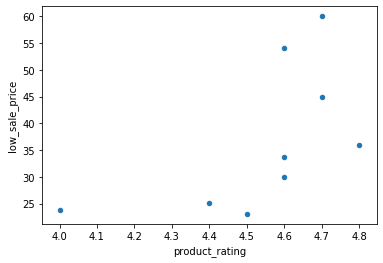

In [55]:
@anvil.server.callable
def scatter_plt():
    import matplotlib.pyplot as plt
    df.plot(x ='product_rating', y='low_sale_price', kind = 'scatter')
    plt.show()
    return 

//functions broken return scatter
df.plot(x ='product_rating', y='low_sale_price', kind = 'scatter')
#### return dataframes ????????? 


#anvil.server.wait_forever()

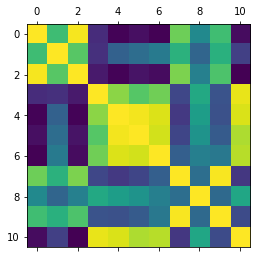

In [64]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()
